                                             Topic Modeling using Wine Descriptions

> For this task I have used the wine descriptions dataset. 
> Using topic modeling, I have explored what kind of ideas are present in the descriptions.

### _Modules_

__pandas__ for extracting text from the wine dataset present in csv format.

__numpy__ & __matplotlib__ used during plotting of topic-document distribution and word-topic distribution charts.

__spacy___ An NLP Library; This is used for text preprocessing such as tokenization, bag of words, lemmetization etc.  

__gensim__ This lib is used for finding words with simialr meanings or contexts and topic modeling using different 
           algorithms for discovering the abstract topics.

__pyLDAvis__ This library is used for visualization purpose for topic-wise distributions.

### _Methodology_
- Combine all the descriptions into a single text corpora and clean the data by excluding 

  stopwords like punctuations, numericals, grammars, and words which are used repetativelty 
  
  in the context of wine or its synonyms throught the descriptions.
  

- Add the lemmatized words for aggregating similar words to respective root words. 

  Note that the stop-words worked on original words before lemmatization. 
  

- Generate a bag-of-words model with word ids and occurrences.


- Apply the following Topic Modeling Algorithms for picking topic models and observe their outputs.

    - Latent Sematic Indexing (LSI)

    - Latent Drichlet Allocation  (LDA)
    
    - Heirarichal Drichlet Process (HDP)
    
    
- Perform Topic Distrbution Visualization for word-wise distribution of topics and topic-wise distribution of descriptions.


- Compare the performance of the 3 different topic models generated by LSI, LDA and HDP.


- Build a word cloud out of the topic model and evaluate popular topics.

__ Importing Modules __

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spacy
import warnings
import gensim
from gensim.models import TfidfModel
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.corpora import Dictionary
import pyLDAvis.gensim

In [2]:
# Extract the csv file into a dataframe. 
### Note : Please change the path address accordingly before proceeding.

frame = pd.read_csv('//Users//ankitasinha//Desktop//data//winedata130k.csv')
frame.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [5]:
frame.shape

(129971, 14)

In [6]:
frame.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


__ Extracting Text __

In [7]:
word_length=[]
for i in frame['description'].values:
    # loop for first 500 descriptions
    if len(word_length)==500:
        break
    else:
        word_length.append(i.lower())

print(" Total Length: ",len(word_length))
print("Subset: ",word_length[:50])


 Total Length:  500
Subset:  ["aromas include tropical fruit, broom, brimstone and dried herb. the palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.", "this is ripe and fruity, a wine that is smooth while still structured. firm tannins are filled out with juicy red berry fruits and freshened with acidity. it's  already drinkable, although it will certainly be better from 2016.", 'tart and snappy, the flavors of lime flesh and rind dominate. some green pineapple pokes through, with crisp acidity underscoring the flavors. the wine was all stainless-steel fermented.', 'pineapple rind, lemon pith and orange blossom start off the aromas. the palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.', "much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. nonetheless, if you think of it as a

__ Preprocessing __

In [8]:
from spacy.lang.en import English
nlp = spacy.load('en')

# this is to load the language model for using lemmas, lookup table, 
# stop_words, lexical attributes etc 

In [9]:
my_stop_words = [u'wine',u'winery',u'winemaking',u'vineyards',
                 'drink','bit','more','slightly']
for stopword in my_stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True


In [10]:
# Applying Language model on the string of texts.
words =[]
def conv_str(text):
    for i in text:
        line = i.split(' ')
        #print(line)
        for j in line:
            #print(j)
            words.append(j)
    #print(words)
    return ' '.join(words)  
text=conv_str(word_length)
doc= nlp(text)
#print(doc[:200])

__Lemmatization__: Adding the root of the word to preserve the context, excluding my stop words or punctuation mark or numericals.

In [11]:
document = []
for d in doc:
    
    if d.text != '\n' and not d.is_stop and not d.is_punct and not d.like_num :
        
        document.append(d.lemma_)
document[0:100]

['aroma',
 'include',
 'tropical',
 'fruit',
 'broom',
 'brimstone',
 'dry',
 'herb',
 'palate',
 'not',
 'overly',
 'expressive',
 'offer',
 'unripened',
 'apple',
 'citrus',
 'dry',
 'sage',
 'alongside',
 'brisk',
 'acidity',
 'ripe',
 'fruity',
 'smooth',
 'structure',
 'firm',
 'tannin',
 'fill',
 'juicy',
 'red',
 'berry',
 'fruit',
 'freshen',
 'acidity',
 'be',
 ' ',
 'drinkable',
 'certainly',
 'good',
 'tart',
 'snappy',
 'flavor',
 'lime',
 'flesh',
 'rind',
 'dominate',
 'green',
 'pineapple',
 'poke',
 'crisp',
 'acidity',
 'underscore',
 'flavor',
 'stainless',
 'steel',
 'ferment',
 'pineapple',
 'rind',
 'lemon',
 'pith',
 'orange',
 'blossom',
 'start',
 'aroma',
 'palate',
 'opulent',
 'note',
 'honey',
 'drizzle',
 'guava',
 'mango',
 'give',
 'way',
 'astringent',
 'semidry',
 'finish',
 'like',
 'regular',
 'bottling',
 'come',
 'rough',
 'tannic',
 'rustic',
 'earthy',
 'herbal',
 'characteristic',
 'nonetheless',
 'think',
 'pleasantly',
 'unfussy',
 'country',
 

__Bag of Words__ : 
(Word_id , Word_Count)

In [18]:
dictionary = Dictionary([document])
corpus = [dictionary.doc2bow(i) for i in [document]]

In [11]:
# In the following code I have used three different topic modeling algorithm to extract abstract topics.
# As suggested, I have gone thru the functioning of these algorithms.
# I finally compared the results obtained. 
# Below are the topic models obtained.

# LSI - Latent Semantic Indexing


In [12]:
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [13]:
# Topic Model 1
lsimodel.show_topics(num_topics=1)  

[(0,
  '0.365*"flavor" + 0.301*"fruit" + 0.248*"aroma" + 0.236*"be" + 0.234*"palate" + 0.230*"finish" + 0.180*"acidity" + 0.161*"ripe" + 0.159*"cherry" + 0.152*"note"')]

# HDP - Hierarchical Dirichlet process 

In [14]:
# Note that HDP is an unsupervised learning algo and picks up K topics on its own.
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)

In [15]:
# Topic Model 2
hdpmodel.show_topics(num_topics=2)

# First model seems more likely to be talking about flavours of the wine.
# Second Model talks likely about texture and ingredients

[(0,
  '0.023*flavor + 0.019*fruit + 0.015*aroma + 0.015*be + 0.014*palate + 0.014*finish + 0.011*acidity + 0.010*ripe + 0.010*cherry + 0.009*note + 0.009*black + 0.008*dry + 0.008*spice + 0.008*tannin + 0.007*rich + 0.007*offer + 0.007*fresh + 0.007*nose + 0.007*oak + 0.006*berry'),
 (1,
  '0.002*char + 0.002*nectarine + 0.002*sangiovese + 0.002*foamy + 0.002*density + 0.002*lick + 0.002*close + 0.002*telltale + 0.002*mad + 0.002*wear + 0.002*rustic + 0.002*miso + 0.002*appeal + 0.002*nacional + 0.002*late + 0.002*chardonnay + 0.002*nosiola + 0.002*modest + 0.002*riper + 0.001*philippe')]

# LDA - Latent Dirichlet Allocation


In [16]:
warnings.filterwarnings('ignore')

In [17]:
ldamodel = LdaModel(corpus=corpus, num_topics=1, id2word=dictionary)

In [18]:
# Topic Model 3
ldamodel.show_topics()

[(0,
  '0.019*"flavor" + 0.016*"fruit" + 0.013*"aroma" + 0.012*"be" + 0.012*"palate" + 0.012*"finish" + 0.009*"acidity" + 0.008*"ripe" + 0.008*"cherry" + 0.008*"note"')]

In [32]:
n_topics=ldamodel.show_topics(formatted=False)

In [33]:
type(n_topics)

list

In [34]:
n_topics[0][1]

[('flavor', 0.019064493),
 ('fruit', 0.015733521),
 ('aroma', 0.0129695255),
 ('be', 0.012331679),
 ('palate', 0.012260808),
 ('finish', 0.012048192),
 ('acidity', 0.009425939),
 ('ripe', 0.008433736),
 ('cherry', 0.008362863),
 ('note', 0.008008504)]

# Visualization of. Topic Models


In [19]:
# From the list of words and their probabilities create a list of topics and topics ids for each topic model obtained. 

lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]



In [18]:
lsitopics[:10]

[['flavor',
  'fruit',
  'aroma',
  'be',
  'palate',
  'finish',
  'acidity',
  'ripe',
  'cherry',
  'note']]

In [19]:
hdptopics[0]

['flavor',
 'fruit',
 'aroma',
 'be',
 'palate',
 'finish',
 'acidity',
 'ripe',
 'cherry',
 'note',
 'black',
 'dry',
 'tannin',
 'spice',
 'offer',
 'rich',
 'fresh',
 'nose',
 'oak',
 'berry']

In [20]:
ldatopics[0:10]

[['flavor',
  'fruit',
  'aroma',
  'be',
  'palate',
  'finish',
  'acidity',
  'ripe',
  'cherry',
  'note']]

__Topic Coherence__

_Helps identify which model is better by giving a score for each topic model_

In [21]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=[document], dictionary=dictionary, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=[document], dictionary=dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=[document], dictionary=dictionary, window_size=10).get_coherence()


In [22]:
lsi_coherence

0.22638082066915458

In [23]:
hdp_coherence

0.7191071425239842

In [24]:
lda_coherence

0.22638082066915458

LDA is an unsupervised technique, meaning that we don’t know prior to running the model how many topics exits in our corpus.You can use LDA visualization tool pyLDAvis, tried a few numbers of topics and compared the results. Topic coherence is one of the main techniques used to estimate the number of topics.

In [29]:
# This function is used to plot the bar grpah.
def visualize_chart(coherences, indices):
    
    n = len(coherences)
    x = np.arange(n)
    width=0.3

    plt.bar(x, coherences, width, tick_label=indices, align='center')        
    plt.xlabel('Topic Modeling Algorithms')
    plt.ylabel('Coherence Value')
    
 
   

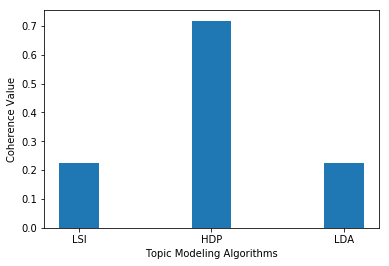

In [30]:
# Calling the above function with cohrence values and respective markers.
visualize_chart([lsi_coherence, hdp_coherence, lda_coherence],
                   ['LSI', 'HDP', 'LDA'])

In [31]:
# Visualization using LDA Model
# λ = 0.05
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary) 

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
# Top 30 most relevant terms for topic 1...10


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.008782 -0.001169       1        1  95.427780
9      0.006228  0.001294       2        1   4.251322
4      0.004370  0.000872       3        1   0.314960
1      0.001979 -0.000922       4        1   0.000848
7      0.000925 -0.000650       5        1   0.000848
3     -0.000374  0.001606       6        1   0.000848
2     -0.001574  0.001619       7        1   0.000848
6     -0.001823 -0.002966       8        1   0.000848
8     -0.004914  0.000328       9        1   0.000848
0     -0.013599 -0.000013      10        1   0.000848, topic_info=     Category        Freq        Term       Total  loglift  logprob
term                                                               
809   Default  200.000000      flavor  200.000000  30.0000  30.0000
875   Default  193.000000       fruit  193.000000  29.0000  29.0000
180   Default  179.000000          be  179.000000  28.0000  28.0000
1439  Default  181.000000      palate  181.000000  27.0000  27.0000
117   Default  182.000000       aroma  182.000000  26.0000  26.0000
797   Default  141.000000      finish  141.000000  25.0000  25.0000
389   Default  145.000000      cherry  145.000000  24.0000  24.0000
36    Default  119.000000     acidity  119.000000  23.0000  23.0000
1711  Default  117.000000        ripe  117.000000  22.0000  22.0000
1381  Default  113.000000        note  113.000000  21.0000  21.0000
1919  Default   97.000000       spice   97.000000  20.0000  20.0000
646   Default   89.000000         dry   89.000000  19.0000  19.0000
211   Default   84.000000       black   84.000000  18.0000  18.0000
2037  Default   86.000000      tannin   86.000000  17.0000  17.0000
200   Default   73.000000       berry   73.000000  16.0000  16.0000
1650  Default   75.000000         red   75.000000  15.0000  15.0000
103   Default   72.000000       apple   72.000000  14.0000  14.0000
862   Default   69.000000       fresh   69.000000  13.0000  13.0000
1697  Default   69.000000        rich   69.000000  12.0000  12.0000
219   Default   72.000000       blend   72.000000  11.0000  11.0000
1400  Default   67.000000       offer   67.000000  10.0000  10.0000
1394  Default   70.000000         oak   70.000000   9.0000   9.0000
2015  Default   60.000000       sweet   60.000000   8.0000   8.0000
1887  Default   57.000000        soft   57.000000   7.0000   7.0000
1528  Default   57.000000        plum   57.000000   6.0000   6.0000
1834  Default   54.000000        show   54.000000   5.0000   5.0000
2267  Default   54.000000       white   54.000000   4.0000   4.0000
921   Default   54.000000        good   54.000000   3.0000   3.0000
1377  Default   50.000000        nose   50.000000   2.0000   2.0000
212   Default   49.000000  blackberry   49.000000   1.0000   1.0000
...       ...         ...         ...         ...      ...      ...
698   Topic10    0.000082       enjoy    6.623890   0.3843  -7.1007
1185  Topic10    0.000235        lime   28.490173  -0.0278  -6.0539
269   Topic10    0.000295      bright   39.783714  -0.1346  -5.8268
743   Topic10    0.000115  expression   10.590120   0.2484  -6.7674
413   Topic10    0.000333      citrus   47.654751  -0.1929  -5.7046
1711  Topic10    0.000630        ripe  117.209259  -0.4560  -5.0677
875   Topic10    0.000885       fruit  193.534637  -0.6175  -4.7278
1015  Topic10    0.000230       honey   28.750940  -0.0573  -6.0744
1464  Topic10    0.000241        pear   31.065872  -0.0887  -6.0282
1176  Topic10    0.000274       light   37.535728  -0.1491  -5.8995
2015  Topic10    0.000381       sweet   60.210835  -0.2929  -5.5707
211   Topic10    0.000480       black   84.657150  -0.4015  -5.3385
1528  Topic10    0.000365        plum   57.105793  -0.2833  -5.6141
227   Topic10    0.000123   blueberry   11.972631   0.1923  -6.7007
1439  Topic10    0.000796      palate  181.824722  -0.6610  -4.8336
36    Topic10    0.000596     acidity  119.47


### My Observations on selecting topics 1 to 10 and the respectiv term frequencies  : 

##### _Topic 1_  : was filled with words like flavor, fruit, aroma which has to do more with the Taste 
##### _Topic 2_ : contained words like concetrated nut, licrorice which has more to do with the acidity
##### _Topic 3_ : consisted of words like bitter, strong, palate which as more to do with the flavour intensity.
##### _Topic 4_ : Words like aroma and nose indicate the subject is talkin about the smell.
##### _Topic 5_ : Words like pepper and finish aftertaste.
##### _Topic 6_ : Words like Toasty and tropical is used to talk about the oaky/woody flavours which indicate the length of storage.
##### _Topic 7_ : Words like weighty and neutral indicate the apparent weight of alcohol.
##### _Topic 8_ : Words like herbs, grapes creaminess, minerals may indicate the crispiness of wine.
##### _Topic 9_ : Words with higher overall term frequency like licorice, young, toasty, vintage, great indicate how old or superior in quality the wine may be.
##### _Topic 10_ : Words like trademark, earth, rise may indicate the location where thr wine is made.



>> Additional Insights :

      Topic 1 -   Taste
      Topic 2 -   Acidity
      Topic 3 -   Smell
      Topic 4 -   Aftertaste
      Topic 5 -   Storage
      Topic 6 -   Length of Storage
      Topic 7 -   Alcohol Concetnration
      Topic 8 -   Crispiness of wine
      Topic 9 -   Age and Quality of wine
      Topic 10 -  Location of winery/vineyard.

- End of File -